In [1]:
# Import necessary Python packages
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools

In [2]:
# Define necessary parameters (as constants)
X              = 10                # number of photons flowing into the detector system (positive integer)
P_D            = 1e-6              # dark count probability (real number between 0 and 1)
ETA            = 0.1               # detector efficiency (real number between 0 and 1)
MU             = 0.02              # mean number of photons detected on some time interval (positive real number)
P_AB           = 0.5               # probability of detecting the coincidence A B (real number between 0 and 1)
P_A_BAR_B      = 0                 # probability of detecting the coincidence A-bar B (real number between 0 and 1)
P_A_B_BAR      = 0                 # probability of detecting the coincidence A B-bar (real number between 0 and 1)
P_A_BAR_B_BAR  = 0.5               # probability of detecting the coincidence A-bar B-bar (real number between 0 and 1)
P_A            = P_AB + P_A_B_BAR  # probability of detecting one basis A (real number between 0 and 1)
P_B            = P_AB + P_A_BAR_B  # probability of detecting one basis B (real number between 0 and 1)
PROBABILITIES  = [P_AB, P_A_BAR_B, P_A_B_BAR, P_A_BAR_B_BAR]

In [3]:
def partitions(k, n):
    masks = np.identity(k, dtype=int)
    for c in itertools.combinations_with_replacement(masks, n):
        yield sum(c)

def multinomial(photon, prob):
    multinomial_coeff = math.factorial(sum(photon)) / (math.factorial(photon[0]) * math.factorial(photon[1]) * math.factorial(photon[2]) * math.factorial(photon[3]))
    prob_coeff = prob[0]**photon[0] * prob[1]**photon[1] * prob[2]**photon[2] * prob[3]**photon[3]
    return multinomial_coeff * prob_coeff

In [4]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_1_actual1(p_d, eta, mu):
    case1_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_1 = (1 - p_d)**2 * (1 - eta)**(2 * sum(photons) - 2) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[2]) * eta) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[1]) * eta)
            sum_multinomial += single_coin_1 * multinomial(photons, PROBABILITIES)
        case1_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    return case1_actual

def case_1_actual2(p_d, eta, mu):
    return (1 - p_d)**2 * np.exp(mu * ((1 - eta)**2 - 1)) * ((p_d + (1 - p_d) * mu * P_A * eta * (1 - eta)) * (p_d + (1 - p_d) * mu * P_B * eta * (1 - eta)) + (1 - p_d)**2 * mu * P_AB * eta**2)

In [5]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_2_actual(p_d, eta, mu):
    case2_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_2 = (1 - p_d)**2 * (1 - eta)**(2 * photons[3] + photons[1] + photons[2]) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[2])) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[1]))
            sum_multinomial += single_coin_2 * multinomial(photons, PROBABILITIES)
        case2_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    return case2_actual

def case_2_approx(p_d, eta, mu):
    return (1 - p_d)**2 * np.exp(mu * ((1 - eta)**2 - 1)) * ((p_d + mu * P_A * eta) * (p_d + mu * P_B * eta) + mu * P_AB * eta**2)

In [6]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_3_actual(p_d, eta, mu):
    case3_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_3 = (1 - eta)**(2 * photons[0] + photons[1] + photons[2] - 2) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[2]) * eta) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[1]) * eta)
            sum_multinomial += single_coin_3 * multinomial(photons, PROBABILITIES)
        case3_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    return case3_actual

def case_3_approx(p_d, eta, mu):
    return (p_d + (1 - 2 * p_d) * mu * P_A * eta) * (p_d + (1 - 2 * p_d) * mu * P_B * eta) + (1 - 2 * p_d)**2 * mu * P_AB * eta**2

In [7]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_4_actual(p_d, eta, mu):
    case4_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_4 = (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[2]))) * (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[1])))
            sum_multinomial += single_coin_4 * multinomial(photons, PROBABILITIES)
        case4_actual += np.exp(-mu) * mu**x / math.factorial(x) * sum_multinomial
    return case4_actual

def case_4_approx(p_d, eta, mu):
    return (p_d + (1 - p_d) * mu * P_A * eta) * (p_d + (1 - p_d) * mu * P_B * eta) + (1 - p_d)**2 * mu * P_AB * eta**2

In [8]:
# Exact probabilities based on varying dark count probability
total_coin_prob_1_PD = []
total_coin_prob_2_PD = []
total_coin_prob_3_PD = []
total_coin_prob_4_PD = []
range_PD = np.arange(0.001, 1, 0.001)
for p_d in range_PD:
    total_coin_prob_1_PD.append(case_1_actual2(p_d, ETA, MU))
    total_coin_prob_2_PD.append(case_2_actual(p_d, ETA, MU))
    total_coin_prob_3_PD.append(case_3_actual(p_d, ETA, MU))
    total_coin_prob_4_PD.append(case_4_actual(p_d, ETA, MU))
print(total_coin_prob_1_PD)
print(total_coin_prob_2_PD)
print(total_coin_prob_3_PD)
print(total_coin_prob_4_PD)

[0.00010280855512669899, 0.0001071604111454225, 0.00011347132816614522, 0.00012172944124005472, 0.00013192290928668582, 0.00014403991509392053, 0.00015806866531798788, 0.0001739973904834643, 0.00019181434498327334, 0.00021150780707868553, 0.00023306607889931875, 0.00025647748644313807, 0.0002817303795764556, 0.0003088131320339308, 0.0003377141414185699, 0.0003684218292017271, 0.0004009246407231028, 0.0004352110451907455, 0.00047126953568104994, 0.0005090886291387588, 0.0005486568663769616, 0.0005899628120770952, 0.0006329950547889432, 0.0006777422069306372, 0.0007241929047886547, 0.0007723358085178219, 0.000822159602141311, 0.0008736529935506414, 0.000926804714505681, 0.0009816035206346434, 0.0010380381914340897, 0.001096097530268929, 0.0011557703643724157, 0.0012170455448461542, 0.0012799119466600935, 0.001344358468652531, 0.0014103740335301106, 0.0014779475878678244, 0.0015470681021090109, 0.001617724570565356, 0.001689906011416893, 0.0017636014667120014, 0.0018388000023674092, 0.001

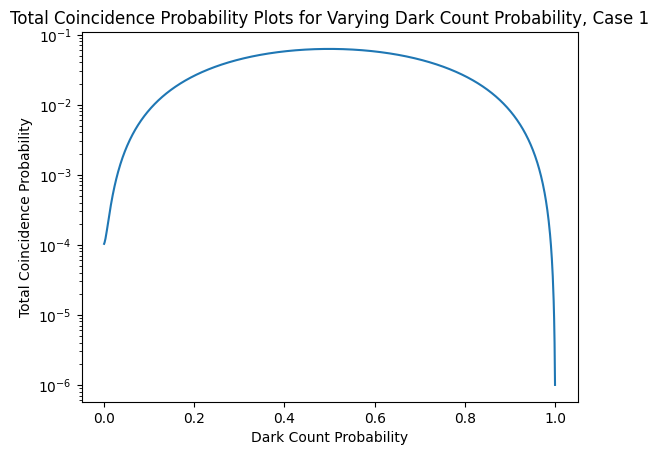

In [44]:
plt.plot(range_PD, total_coin_prob_1_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 1')
plt.savefig("total_coin_prob_1_PD_1.png")
plt.show()

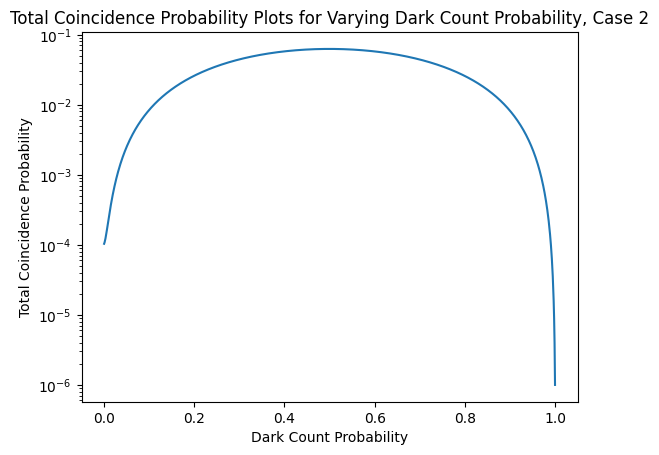

In [45]:
plt.plot(range_PD, total_coin_prob_2_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 2')
plt.savefig("total_coin_prob_2_PD_1.png")
plt.show()

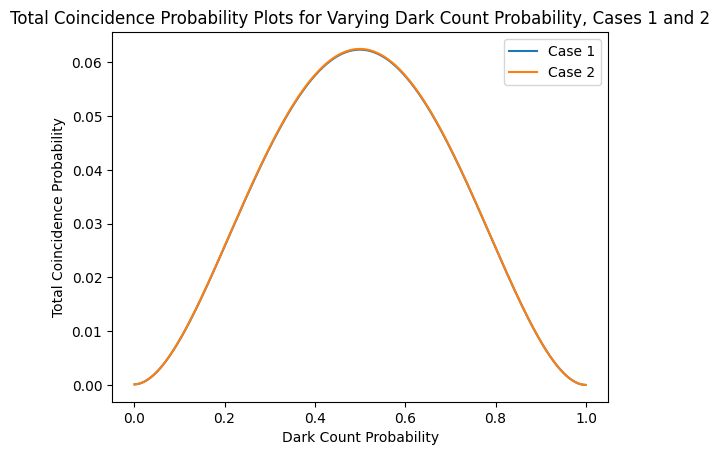

In [11]:
plt.plot(range_PD, total_coin_prob_1_PD, label = 'Case 1')
plt.plot(range_PD, total_coin_prob_2_PD, label = 'Case 2')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Cases 1 and 2')
plt.legend()
plt.savefig("total_coin_prob_12_PD_1.png")
plt.show()

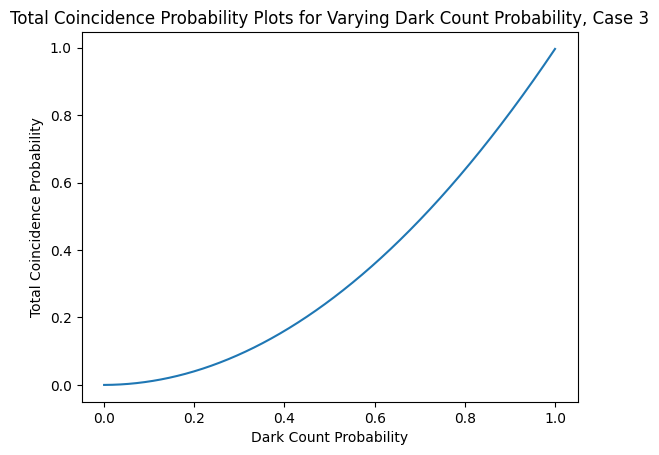

In [12]:
plt.plot(range_PD, total_coin_prob_3_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 3')
plt.savefig("total_coin_prob_3_PD_1.png")
plt.show()

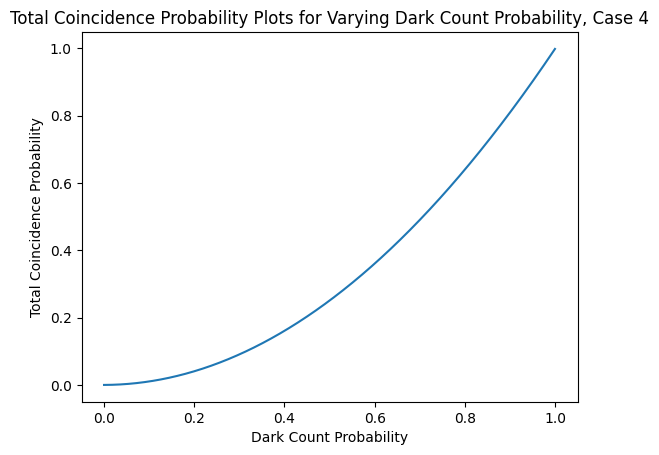

In [13]:
plt.plot(range_PD, total_coin_prob_4_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 4')
plt.savefig("total_coin_prob_4_PD_1.png")
plt.show()

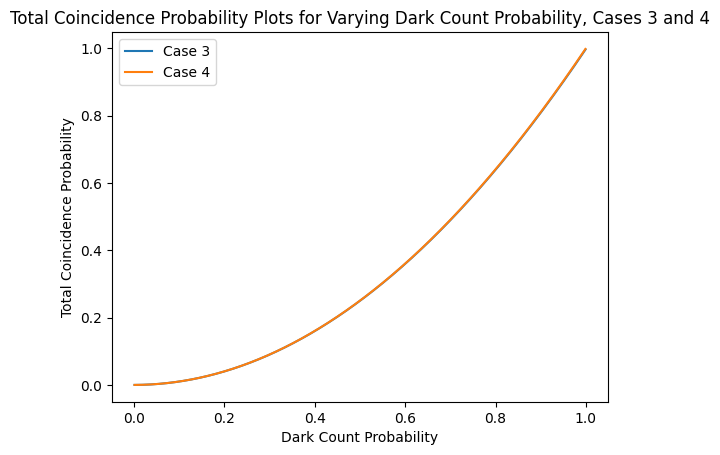

In [14]:
plt.plot(range_PD, total_coin_prob_3_PD, label = 'Case 3')
plt.plot(range_PD, total_coin_prob_4_PD, label = 'Case 4')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Cases 3 and 4')
plt.legend()
plt.savefig("total_coin_prob_34_PD_1.png")
plt.show()

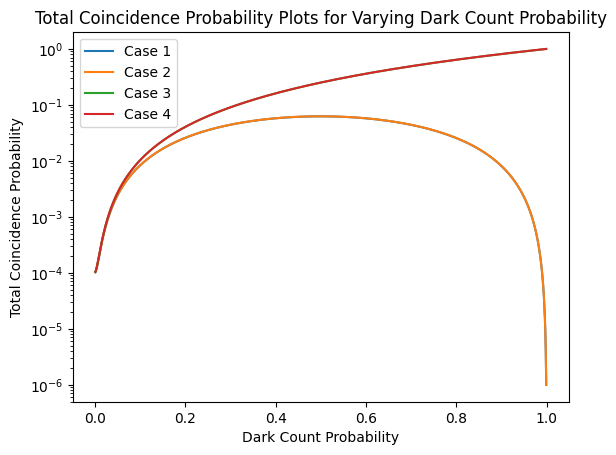

In [46]:
# Plot exact probabilities based on varying dark count probability
plt.plot(range_PD, total_coin_prob_1_PD, label = 'Case 1')
plt.plot(range_PD, total_coin_prob_2_PD, label = 'Case 2')
plt.plot(range_PD, total_coin_prob_3_PD, label = 'Case 3')
plt.plot(range_PD, total_coin_prob_4_PD, label = 'Case 4')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability')
plt.legend()
plt.savefig("total_coin_prob_PD_1.png")
plt.show()
# plt.close()

In [16]:
# Exact probabilities based on varying detector efficiency
total_coin_prob_1_eta = []
total_coin_prob_2_eta = []
total_coin_prob_3_eta = []
total_coin_prob_4_eta = []
range_eta = np.arange(0.001, 1, 0.001)
for eta in range_eta:
    total_coin_prob_1_eta.append(case_1_actual2(P_D, eta, MU))
    total_coin_prob_2_eta.append(case_2_actual(P_D, eta, MU))
    total_coin_prob_3_eta.append(case_3_actual(P_D, eta, MU))
    total_coin_prob_4_eta.append(case_4_actual(P_D, eta, MU))
print(total_coin_prob_1_eta)
print(total_coin_prob_2_eta)
print(total_coin_prob_3_eta)
print(total_coin_prob_4_eta)

[1.0120335019837884e-08, 4.043592811636129e-08, 9.094416675773107e-08, 1.6164144604407058e-07, 2.525241687035121e-07, 3.6358874509024584e-07, 4.948315931825732e-07, 6.462491385809621e-07, 8.178378145061061e-07, 1.0095940617969862e-06, 1.2215143289089358e-06, 1.4535950719117125e-06, 1.705832754487565e-06, 1.9782238479293092e-06, 2.270764831138409e-06, 2.583452190623055e-06, 2.91628242049625e-06, 3.2692520224738946e-06, 3.6423575058728814e-06, 4.035595387609184e-06, 4.4489621921959595e-06, 4.8824544517416446e-06, 5.33606870594806e-06, 5.80980150210852e-06, 6.303649395105937e-06, 6.817608947410939e-06, 7.3516767290799786e-06, 7.905849317753462e-06, 8.48012329865387e-06, 9.074495264583867e-06, 9.688961815924454e-06, 1.0323519560633095e-05, 1.0978165114241826e-05, 1.1652895099855426e-05, 1.2347706148149549e-05, 1.306259489736885e-05, 1.3797557993325172e-05, 1.4552592089395635e-05, 1.532769384652087e-05, 1.6122859933203102e-05, 1.693808702550436e-05, 1.7773371807044602e-05, 1.862871096899992

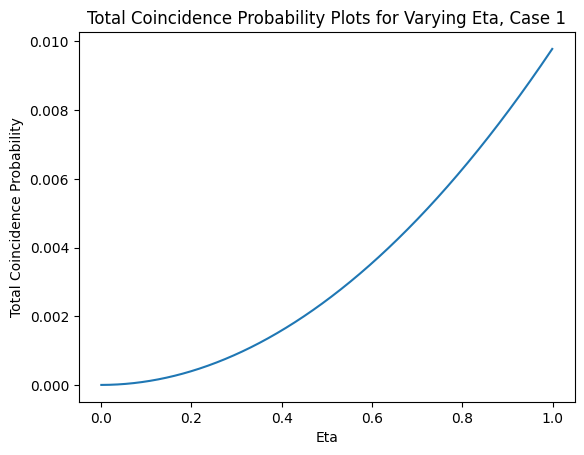

In [17]:
plt.plot(range_eta, total_coin_prob_1_eta)
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 1')
plt.savefig("total_coin_prob_1_eta_1.png")
plt.show()

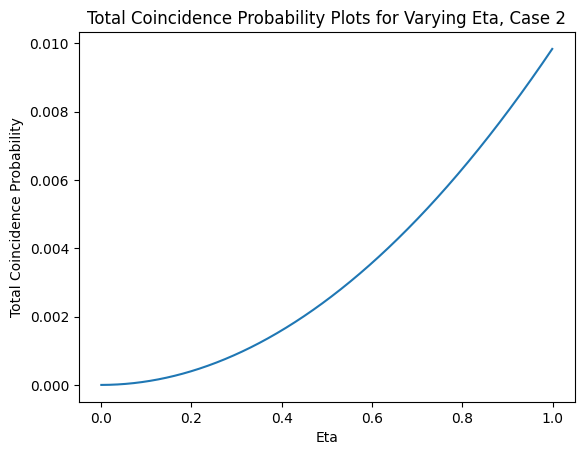

In [18]:
plt.plot(range_eta, total_coin_prob_2_eta)
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 2')
plt.savefig("total_coin_prob_2_eta_1.png")
plt.show()

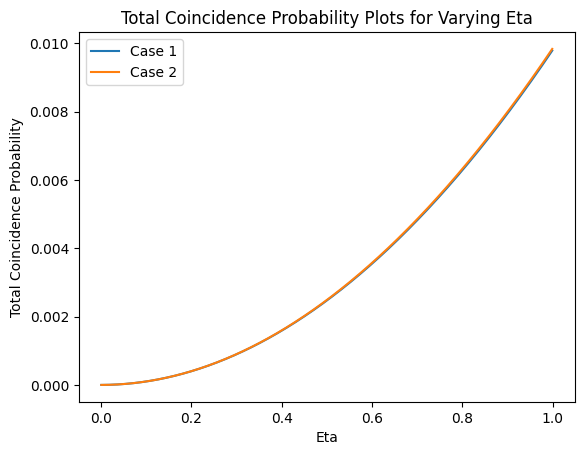

In [19]:
plt.plot(range_eta, total_coin_prob_1_eta, label = 'Case 1')
plt.plot(range_eta, total_coin_prob_2_eta, label = 'Case 2')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta')
plt.legend()
plt.savefig("total_coin_prob_12_eta_1.png")
plt.show()

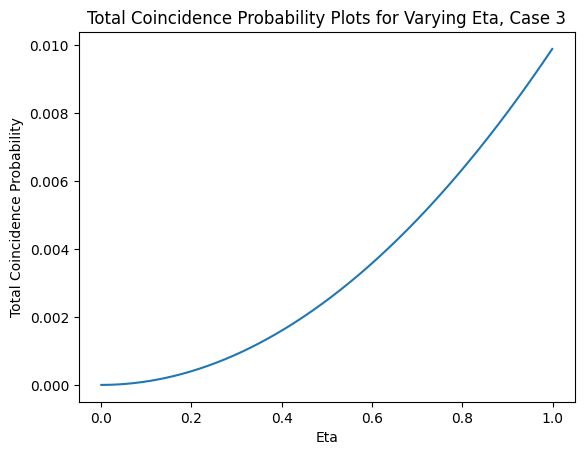

In [20]:
plt.plot(range_eta, total_coin_prob_3_eta)
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 3')
plt.savefig("total_coin_prob_3_eta_1.png")
plt.show()

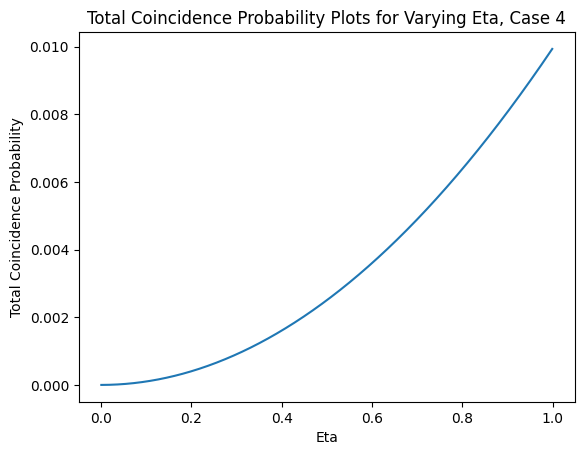

In [21]:
plt.plot(range_eta, total_coin_prob_4_eta)
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 4')
plt.savefig("total_coin_prob_4_eta_1.png")
plt.show()

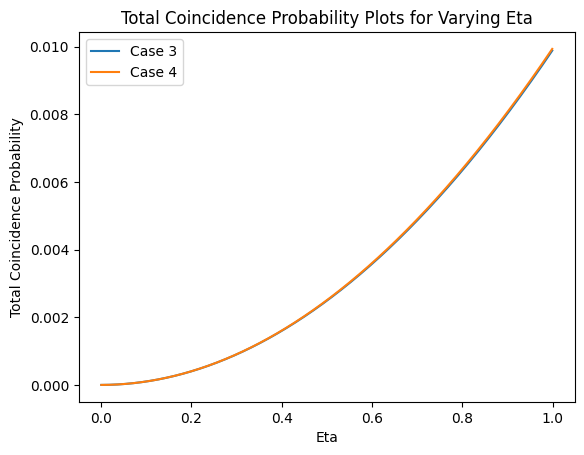

In [22]:
plt.plot(range_eta, total_coin_prob_3_eta, label = 'Case 3')
plt.plot(range_eta, total_coin_prob_4_eta, label = 'Case 4')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta')
plt.legend()
plt.savefig("total_coin_prob_34_eta_1.png")
plt.show()

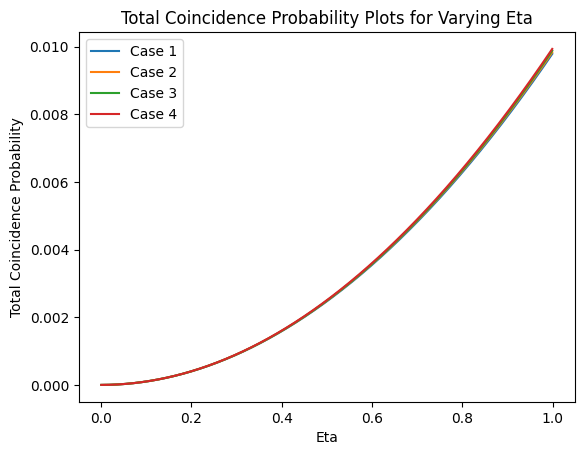

In [23]:
# Plot exact probabilities based on varying detector efficiency
plt.plot(range_eta, total_coin_prob_1_eta, label = 'Case 1')
plt.plot(range_eta, total_coin_prob_2_eta, label = 'Case 2')
plt.plot(range_eta, total_coin_prob_3_eta, label = 'Case 3')
plt.plot(range_eta, total_coin_prob_4_eta, label = 'Case 4')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta')
plt.legend()
plt.savefig("total_coin_prob_eta_1.png")
plt.show()
# plt.close()

In [24]:
# Exact probabilities based on varying mean number of photons detected on some time interval
total_coin_prob_1_mu = []
total_coin_prob_2_mu = []
total_coin_prob_3_mu = []
total_coin_prob_4_mu = []
range_mu = np.arange(0.001, 1, 0.001)
for mu in range_mu:
    total_coin_prob_1_mu.append(case_1_actual2(P_D, ETA, mu))
    total_coin_prob_2_mu.append(case_2_actual(P_D, ETA, mu))
    total_coin_prob_3_mu.append(case_3_actual(P_D, ETA, mu))
    total_coin_prob_4_mu.append(case_4_actual(P_D, ETA, mu))
print(total_coin_prob_1_mu)
print(total_coin_prob_2_mu)
print(total_coin_prob_3_mu)
print(total_coin_prob_4_mu)

[5.001145683701713e-06, 1.0004438558054024e-05, 1.5009877857181505e-05, 2.0017461815950293e-05, 2.5027188669965823e-05, 3.0039056655572596e-05, 3.5053064009853934e-05, 4.0069208970631745e-05, 4.508748977646625e-05, 5.0107904666655756e-05, 5.5130451881236405e-05, 6.015512966098198e-05, 6.518193624740356e-05, 7.021086988274934e-05, 7.524192881000442e-05, 8.027511127289048e-05, 8.531041551586558e-05, 9.034783978412392e-05, 9.538738232359557e-05, 0.00010042904138094626, 0.00010547281520357711, 0.00011051870203962439, 0.00011556670013795931, 0.0001206168077481877, 0.0001256690231206499, 0.00013072334450642026, 0.00013577977015730722, 0.00014083829832585294, 0.00014589892726533287, 0.0001509616552297558, 0.0001560264804738634, 0.00016109340125313018, 0.00016616241582376295, 0.00017123352244270096, 0.00017630671936761527, 0.00018138200485690875, 0.00018645937716971585, 0.00019153883456590214, 0.00019662037530606438, 0.00020170399765152995, 0.00020678969986435687, 0.0002118774802073335, 0.0002

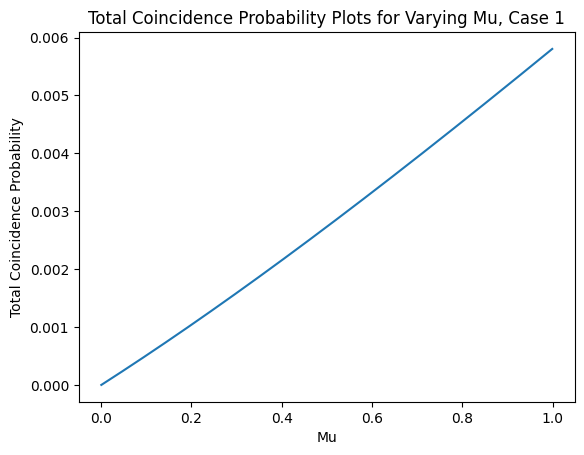

In [25]:
plt.plot(range_mu, total_coin_prob_1_mu)
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 1')
plt.savefig("total_coin_prob_1_mu_1.png")
plt.show()

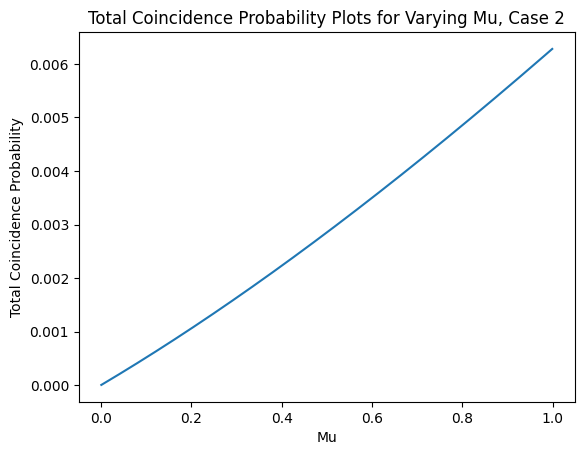

In [26]:
plt.plot(range_mu, total_coin_prob_2_mu)
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 2')
plt.savefig("total_coin_prob_2_mu_1.png")
plt.show()

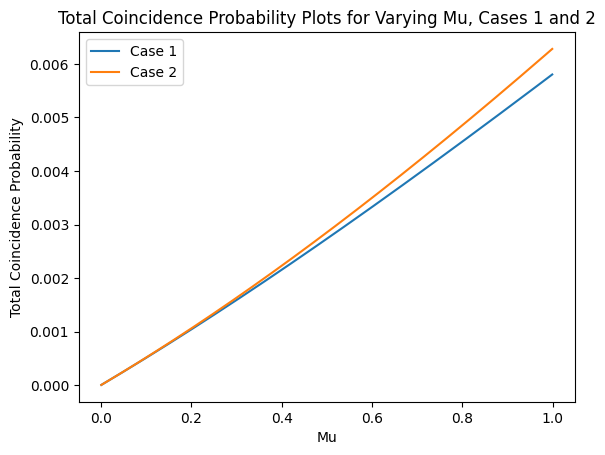

In [27]:
plt.plot(range_mu, total_coin_prob_1_mu, label = 'Case 1')
plt.plot(range_mu, total_coin_prob_2_mu, label = 'Case 2')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Cases 1 and 2')
plt.legend()
plt.savefig("total_coin_prob_12_mu_1.png")
plt.show()

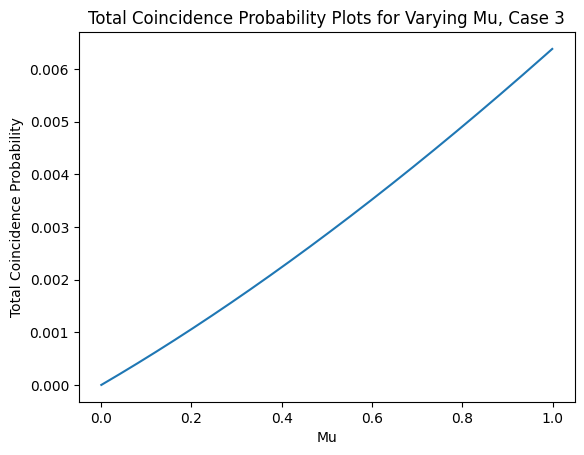

In [28]:
plt.plot(range_mu, total_coin_prob_3_mu)
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 3')
plt.savefig("total_coin_prob_3_mu_1.png")
plt.show()

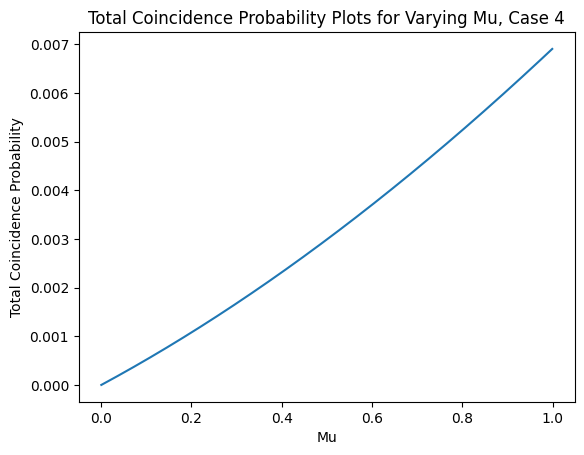

In [29]:
plt.plot(range_mu, total_coin_prob_4_mu)
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 4')
plt.savefig("total_coin_prob_4_mu_1.png")
plt.show()

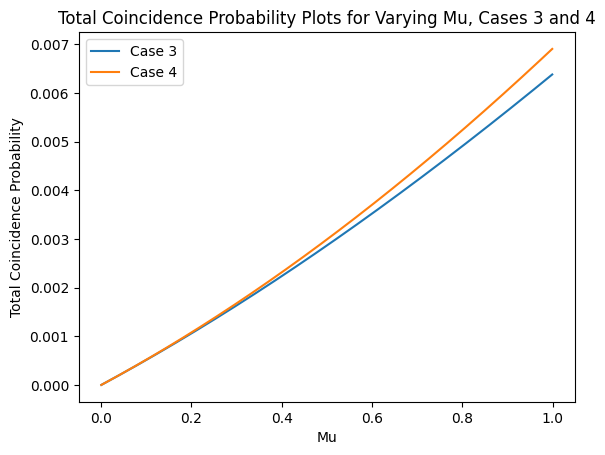

In [30]:
plt.plot(range_mu, total_coin_prob_3_mu, label = 'Case 3')
plt.plot(range_mu, total_coin_prob_4_mu, label = 'Case 4')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Cases 3 and 4')
plt.legend()
plt.savefig("total_coin_prob_34_mu_1.png")
plt.show()

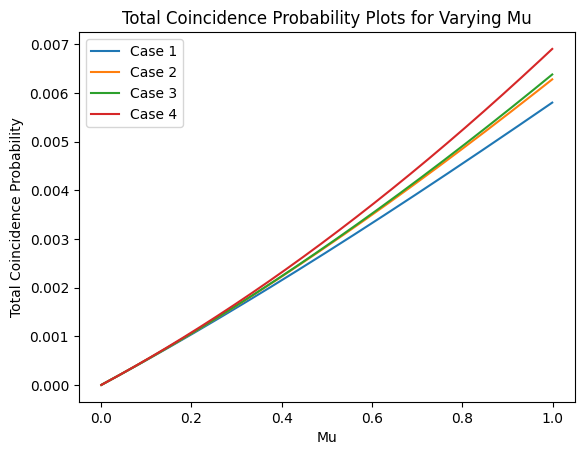

In [31]:
# Plot exact probabilities based on varying detector efficiency
plt.plot(range_mu, total_coin_prob_1_mu, label = 'Case 1')
plt.plot(range_mu, total_coin_prob_2_mu, label = 'Case 2')
plt.plot(range_mu, total_coin_prob_3_mu, label = 'Case 3')
plt.plot(range_mu, total_coin_prob_4_mu, label = 'Case 4')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu')
plt.legend()
plt.savefig("total_coin_prob_mu_1.png")
plt.show()
# plt.close()

In [32]:
total_coin_prob_2_PD_approx = []
total_coin_prob_3_PD_approx = []
total_coin_prob_4_PD_approx = []
for p_d in range_PD:
    total_coin_prob_2_PD_approx.append(case_2_approx(p_d, ETA, MU))
    total_coin_prob_3_PD_approx.append(case_3_approx(p_d, ETA, MU))
    total_coin_prob_4_PD_approx.append(case_4_approx(p_d, ETA, MU))
print(total_coin_prob_2_PD_approx)
print(total_coin_prob_3_PD_approx)
print(total_coin_prob_4_PD_approx)

[0.0001033984424354786, 0.00010815267398651249, 0.00011486771628171566, 0.00012353168656147693, 0.00013413272597515816, 0.0001466589995810943, 0.00016109869634659338, 0.00017744002914793643, 0.0001956712347703776, 0.0002157805739081441, 0.00023775633116443606, 0.0002615868150514269, 0.000287260357990263, 0.00031476531631106377, 0.0003440900702529215, 0.0003752230239639021, 0.00040815260550104406, 0.00044286726683035886, 0.0004793554838268315, 0.0005176057562744194, 0.0005576066078660538, 0.0005993465862036385, 0.0006428142627980503, 0.0006879982330691396, 0.0007348871163457292, 0.0007834695558656152, 0.0008337342187755671, 0.0008856697961313268, 0.0009392650028976102, 0.0009945085779481052, 0.0010513892840654732, 0.0011098959079413496, 0.0011700172601763407, 0.0012317421752800282, 0.0012950595116709655, 0.001359958151676679, 0.0014264270015336687, 0.0014944549913874072, 0.0015640310752923412, 0.0016351442312118895, 0.001707783461018444, 0.0017819377904933697, 0.001857596269327005, 0.00

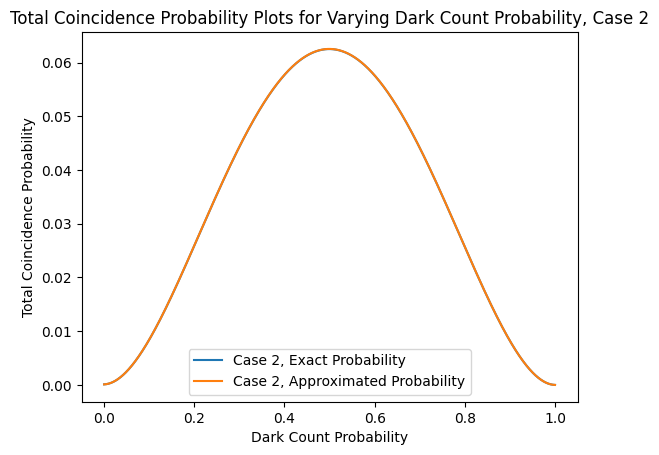

In [33]:
plt.plot(range_PD, total_coin_prob_2_PD, label = 'Case 2, Exact Probability')
plt.plot(range_PD, total_coin_prob_2_PD_approx, label = 'Case 2, Approximated Probability')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 2')
plt.legend()
plt.savefig("total_coin_prob_2_PD_comp_1.png")
plt.show()

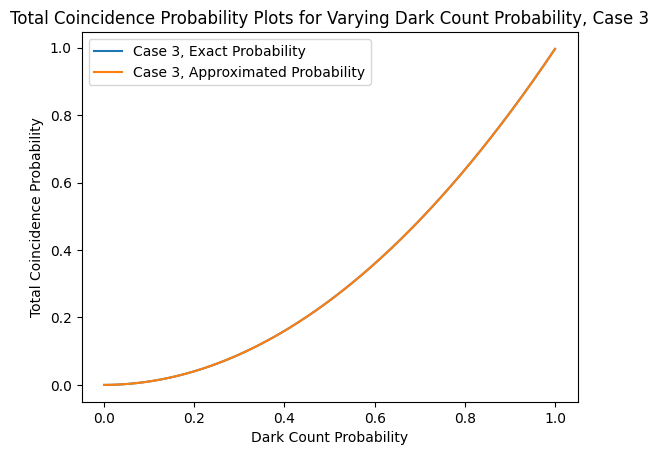

In [34]:
plt.plot(range_PD, total_coin_prob_3_PD, label = 'Case 3, Exact Probability')
plt.plot(range_PD, total_coin_prob_3_PD_approx, label = 'Case 3, Approximated Probability')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 3')
plt.legend()
plt.savefig("total_coin_prob_3_PD_comp_1.png")
plt.show()

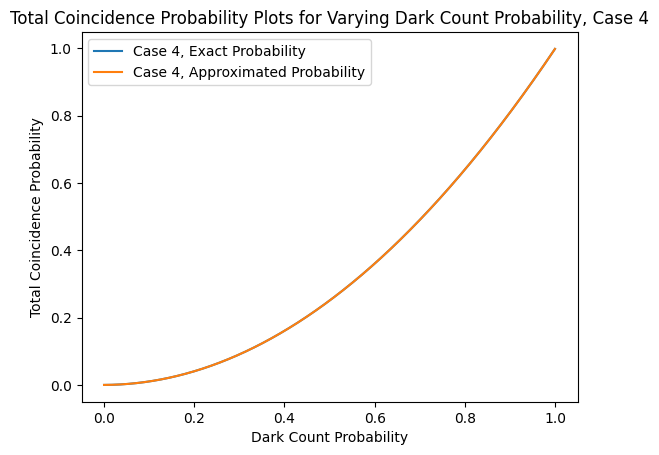

In [35]:
plt.plot(range_PD, total_coin_prob_4_PD, label = 'Case 4, Exact Probability')
plt.plot(range_PD, total_coin_prob_4_PD_approx, label = 'Case 4, Approximated Probability')
plt.xlabel('Dark Count Probability')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Dark Count Probability, Case 4')
plt.legend()
plt.savefig("total_coin_prob_4_PD_comp_1.png")
plt.show()

In [36]:
total_coin_prob_2_eta_approx = []
total_coin_prob_3_eta_approx = []
total_coin_prob_4_eta_approx = []
for eta in range_eta:
    total_coin_prob_2_eta_approx.append(case_2_approx(P_D, eta, MU))
    total_coin_prob_3_eta_approx.append(case_3_approx(P_D, eta, MU))
    total_coin_prob_4_eta_approx.append(case_4_approx(P_D, eta, MU))
print(total_coin_prob_2_eta_approx)
print(total_coin_prob_3_eta_approx)
print(total_coin_prob_4_eta_approx)

[1.0120575129327977e-08, 4.0437687208933326e-08, 9.094991980579737e-08, 1.6165486152884926e-07, 2.5255010602598754e-07, 3.636332519831027e-07, 4.949019031231026e-07, 6.463536682049373e-07, 8.179861610226283e-07, 1.009797000404296e-06, 1.2217838102111914e-06, 1.4539442193367303e-06, 1.706275861705524e-06, 1.9787763762724162e-06, 2.271443407021519e-06, 2.584274602965257e-06, 2.9172676181433994e-06, 3.2704201116221066e-06, 3.6437297474929736e-06, 4.037194194872071e-06, 4.4508111278989985e-06, 4.8845782257359275e-06, 5.338493172566648e-06, 5.812553657595631e-06, 6.30675737504707e-06, 6.821102024163937e-06, 7.355585309207042e-06, 7.910204939454095e-06, 8.484958629198751e-06, 9.079844097749684e-06, 9.694859069429636e-06, 1.0330001273574502e-05, 1.0985268444532371e-05, 1.1660658321662605e-05, 1.2356168649334906e-05, 1.3071797176928385e-05, 1.380754165883064e-05, 1.4563399854436807e-05, 1.5339369528148674e-05, 1.613544844937372e-05, 1.69516343925242e-05, 1.7787925137016244e-05, 1.8644318467268

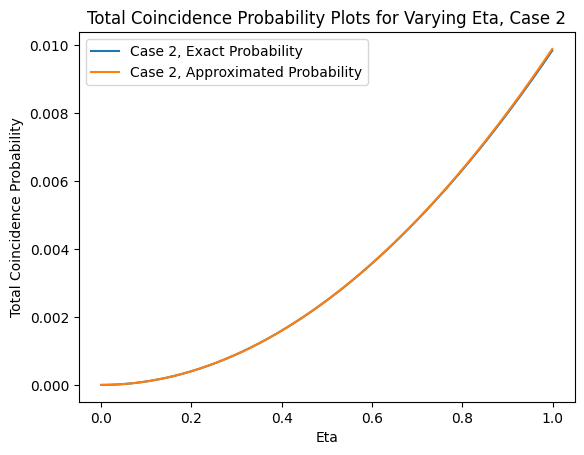

In [37]:
plt.plot(range_eta, total_coin_prob_2_eta, label = 'Case 2, Exact Probability')
plt.plot(range_eta, total_coin_prob_2_eta_approx, label = 'Case 2, Approximated Probability')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 2')
plt.legend()
plt.savefig("total_coin_prob_2_eta_comp_1.png")
plt.show()

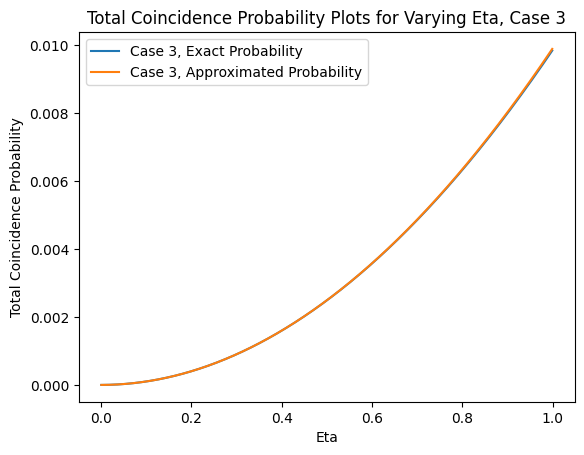

In [38]:
plt.plot(range_eta, total_coin_prob_2_eta, label = 'Case 3, Exact Probability')
plt.plot(range_eta, total_coin_prob_2_eta_approx, label = 'Case 3, Approximated Probability')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 3')
plt.legend()
plt.savefig("total_coin_prob_3_eta_comp_1.png")
plt.show()

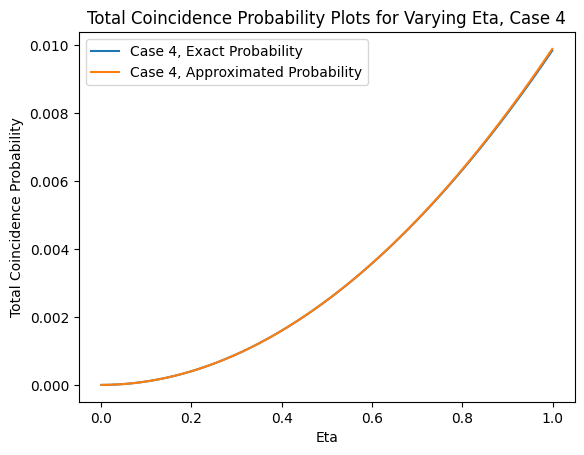

In [39]:
plt.plot(range_eta, total_coin_prob_2_eta, label = 'Case 4, Exact Probability')
plt.plot(range_eta, total_coin_prob_2_eta_approx, label = 'Case 4, Approximated Probability')
plt.xlabel('Eta')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Eta, Case 4')
plt.legend()
plt.savefig("total_coin_prob_4_eta_comp_1.png")
plt.show()

In [40]:
total_coin_prob_2_mu_approx = []
total_coin_prob_3_mu_approx = []
total_coin_prob_4_mu_approx = []
for mu in range_mu:
    total_coin_prob_2_mu_approx.append(case_2_approx(P_D, ETA, mu))
    total_coin_prob_3_mu_approx.append(case_3_approx(P_D, ETA, mu))
    total_coin_prob_4_mu_approx.append(case_4_approx(P_D, ETA, mu))
print(total_coin_prob_2_mu_approx)
print(total_coin_prob_3_mu_approx)
print(total_coin_prob_4_mu_approx)

[5.00164059280504e-06, 1.000637783347929e-05, 1.501421041495453e-05, 2.0025136031109746e-05, 2.5039152376768784e-05, 3.0056257147700098e-05, 3.5076448040616375e-05, 4.0099722753174275e-05, 4.512607898397411e-05, 5.0155514432559495e-05, 5.518802679941709e-05, 6.022361378597631e-05, 6.526227309460891e-05, 7.030400242862876e-05, 7.534879949229155e-05, 8.039666199079444e-05, 8.544758763027573e-05, 9.050157411781463e-05, 9.555861916143083e-05, 0.00010061872047008431, 0.00010568187575367503, 0.00011074808272304246, 0.0001158173390899655, 0.00012088964256716201, 0.00012596499086828854, 0.00013104338170794006, 0.0001361248128016496, 0.00014120928186588794, 0.00014629678661806343, 0.00015138732477652152, 0.00015648089406054445, 0.0001615774921903511, 0.00016667711688709655, 0.0001717797658728718, 0.00017688543687070348, 0.00018199412760455354, 0.00018710583579931893, 0.0001922205591808313, 0.00019733829547585675, 0.00020245904241209531, 0.000207582797718181, 0.00021270955912368125, 0.0002178393

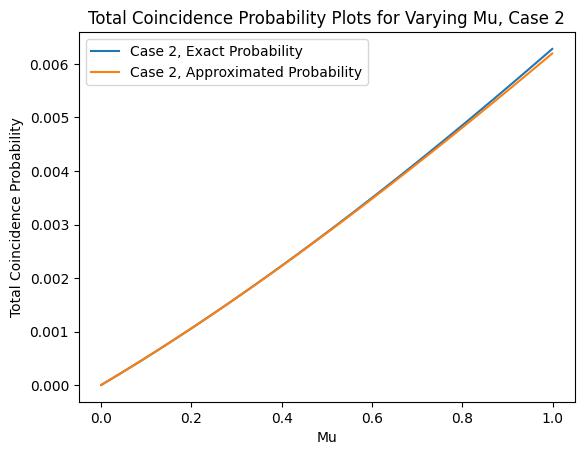

In [41]:
plt.plot(range_mu, total_coin_prob_2_mu, label = 'Case 2, Exact Probability')
plt.plot(range_mu, total_coin_prob_2_mu_approx, label = 'Case 2, Approximated Probability')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 2')
plt.legend()
plt.savefig("total_coin_prob_2_mu_comp_1.png")
plt.show()

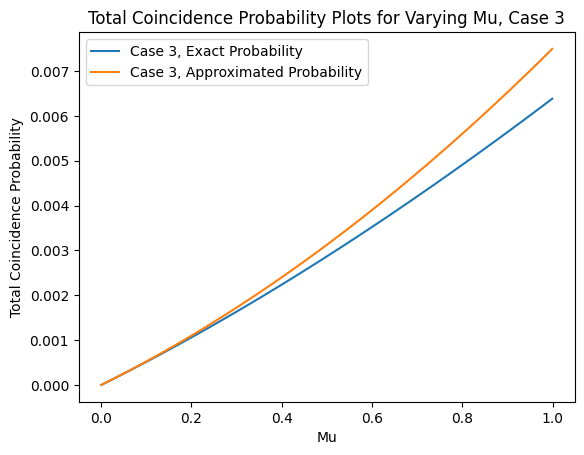

In [42]:
plt.plot(range_mu, total_coin_prob_3_mu, label = 'Case 3, Exact Probability')
plt.plot(range_mu, total_coin_prob_3_mu_approx, label = 'Case 3, Approximated Probability')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 3')
plt.legend()
plt.savefig("total_coin_prob_3_mu_comp_1.png")
plt.show()

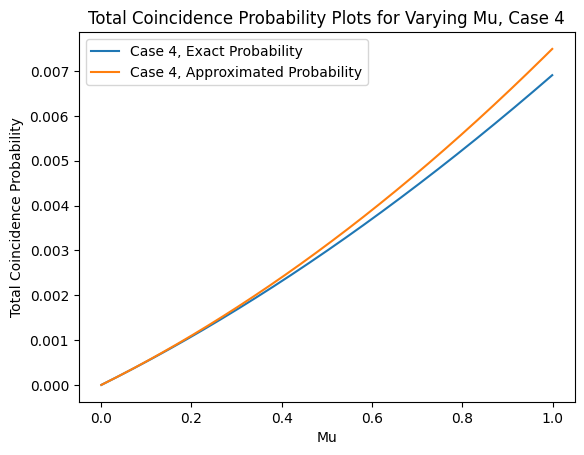

In [43]:
plt.plot(range_mu, total_coin_prob_4_mu, label = 'Case 4, Exact Probability')
plt.plot(range_mu, total_coin_prob_4_mu_approx, label = 'Case 4, Approximated Probability')
plt.xlabel('Mu')
plt.ylabel('Total Coincidence Probability')
plt.title('Total Coincidence Probability Plots for Varying Mu, Case 4')
plt.legend()
plt.savefig("total_coin_prob_4_mu_comp_1.png")
plt.show()